# Dataset EDA

Simple EDA prior to data cleaning and feature engineering/pruning.

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import geopandas as gpd 
import contextily as ctx
from shapely.geometry import Point 

%matplotlib inline

## Importing Dataset

In [3]:
df_features = pd.read_csv('../data/raw/training_set_values.csv')
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [4]:
df_target = pd.read_csv('../data/raw/training_set_labels.csv')
df_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 928.3+ KB


In [5]:
# Combined dataframe of features and target variables
df = df_features.copy()
df['target'] = df_target['status_group']

## Examining Target Variable

In [6]:
# Checking class balance
df['target'].value_counts()

target
functional                 32259
non functional             22824
functional needs repair     4317
Name: count, dtype: int64

/var/folders/qw/rb7_t46j2zzdbl34bgb2vjg40000gn/T/ipykernel_60243/2376646502.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=target_counts.index, x=target_counts.values, palette='Dark2')


Text(0.5, 0, 'Count')

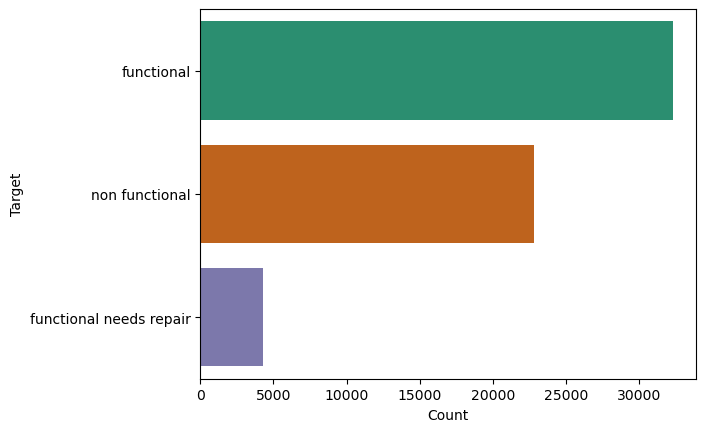

In [31]:
target_counts = df['target'].value_counts()
ax = sns.barplot(y=target_counts.index, x=target_counts.values, palette='Dark2')
ax.set_ylabel('Target')
ax.set_xlabel('Count')

There is a clear **class imbalance** with 'functional needs repair' recorded at a way lower frequency in the dataset. There are three paths I can take here. The first and easiest to execute is simply treating 'functional needs repair' as an irrelevant target and dropping it completely from the dataset.

The second is investigating whether the smallest class here is similar enough to one of the larger classes and merge it with the class it is most similar with. For example, perhaps 'funcional needs repair' means that a water pump is functional enough that it could be merged into the 'functional' target class. 

The third option is to employ some of the myriad techniques that deal with imbalanced classes in ML. I could use SMOTE or oversampling/undersampling with the imblearn library. 

/var/folders/qw/rb7_t46j2zzdbl34bgb2vjg40000gn/T/ipykernel_60243/1653624215.py:14: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  gdf_in_tanzania = gpd.sjoin(gdf, tanzania, how="inner", predicate="within")


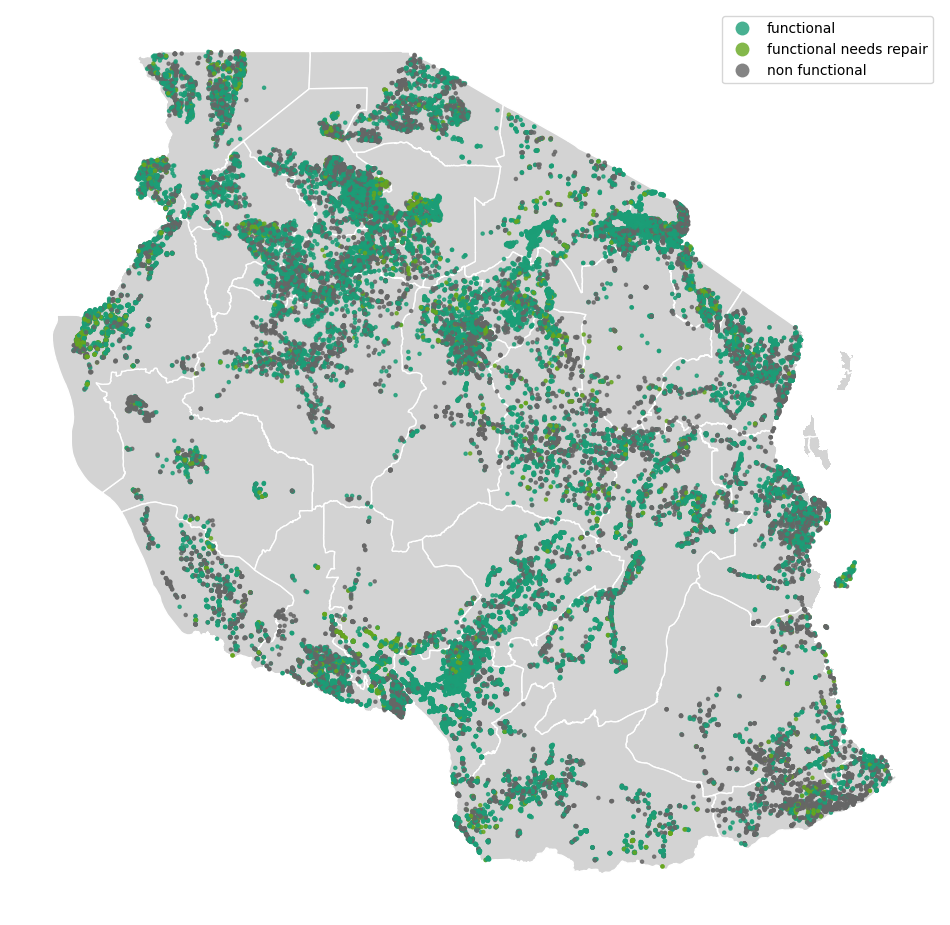

In [32]:
# Plotting water pump status (target) on map of Tanzania

# Load Tanzania shapefile (country boundary)
tanzania = gpd.read_file("../images/shapefiles/gadm41_TZA_1.shp")

# Load your data (coordinates in the dataset)
coordinates_df = df[['longitude', 'latitude', 'target']].dropna()

# Create GeoDataFrame from coordinates
geometry = [Point(xy) for xy in zip(coordinates_df['longitude'], coordinates_df['latitude'])]
gdf = gpd.GeoDataFrame(coordinates_df, geometry=geometry, crs="EPSG:4326")  # Set CRS to WGS 84

# Filter points that are within Tanzania's boundary
gdf_in_tanzania = gpd.sjoin(gdf, tanzania, how="inner", predicate="within")

# Plot Tanzania's boundary and data points
fig, ax = plt.subplots(figsize=(12, 12))
tanzania.plot(ax=ax, color="lightgray", edgecolor='white')  # Plot Tanzania shape
gdf_in_tanzania.plot(ax=ax, column='target', cmap='Dark2', legend=True, markersize=5, alpha=0.8)  # Plot points inside Tanzania

legend = ax.get_legend()
legend.set_bbox_to_anchor((1, 1))

# Remove axis for a cleaner map
ax.set_axis_off()

# Show the map
plt.show()

/var/folders/qw/rb7_t46j2zzdbl34bgb2vjg40000gn/T/ipykernel_60243/1687686299.py:12: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  gdf_in_tanzania = gpd.sjoin(gdf, tanzania, how="inner", predicate="within")


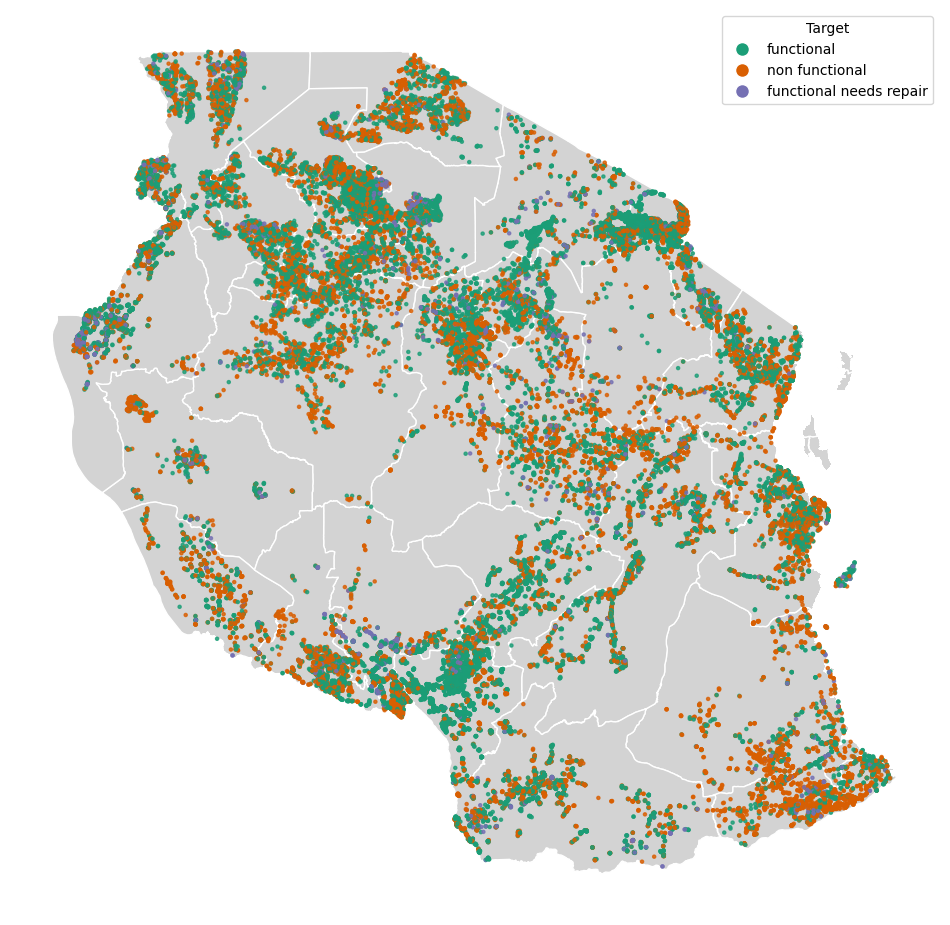

In [30]:
# Plotting target variables on map of Tanzania

# Load Tanzania shapefile (country boundary)
tanzania = gpd.read_file("../images/shapefiles/gadm41_TZA_1.shp")

# Load your data (coordinates in the dataset)
coordinates_df = df[['longitude', 'latitude', 'target']].dropna()

# Create GeoDataFrame from coordinates
geometry = [Point(xy) for xy in zip(coordinates_df['longitude'], coordinates_df['latitude'])]
gdf = gpd.GeoDataFrame(coordinates_df, geometry=geometry, crs="EPSG:4326")  # Set CRS to WGS 84

# Filter points that are within Tanzania's boundary
gdf_in_tanzania = gpd.sjoin(gdf, tanzania, how="inner", predicate="within")

# Get the unique categories from the 'target' column
unique_categories = gdf_in_tanzania['target'].unique()

# Create a seaborn color palette
palette = sns.color_palette('Dark2', n_colors=len(unique_categories))

# Create a dictionary to map each category to a color
color_dict = dict(zip(unique_categories, palette))

# Map the colors to the 'target' column in the GeoDataFrame
gdf_in_tanzania['color'] = gdf_in_tanzania['target'].map(color_dict)

# Plot Tanzania's boundary and data points with the mapped colors
fig, ax = plt.subplots(figsize=(12, 12))

# Plot Tanzania shape
tanzania.plot(ax=ax, color="lightgray", edgecolor='white')

# Plot points using the manually mapped colors
gdf_in_tanzania.plot(ax=ax, color=gdf_in_tanzania['color'], markersize=5, alpha=0.8)

# Create a custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_dict[cat], markersize=10, label=cat)
           for cat in unique_categories]
ax.legend(handles=handles, title="Target", bbox_to_anchor=(1, 1))

# Remove axis for a cleaner map
ax.set_axis_off()

# Show the map
plt.show()